### 수원인근대학교

In [1]:
import folium
import pandas as pd
import requests, json
from urllib.parse import quote 

In [2]:
with open('data/roadapikey.txt') as f:
    road_key = f.read()

In [3]:
# 한글은 반드시 인코딩해서 보내야 함
quote('아주대학교')

'%EC%95%84%EC%A3%BC%EB%8C%80%ED%95%99%EA%B5%90'

In [4]:
# url 만들기
base_url = 'https://www.juso.go.kr/addrlink/addrLinkApiJsonp.do' #가이드에있는 API기본정보 get호출
params1 = f'confmKey={road_key}&currentPage=1&countPerPage=10' # currentPage, countPerPage 는 기본값
params2 = f"keyword={quote('아주대학교')}&resultType=json" # 인코딩된 키 넣어주기
url = f'{base_url}?{params1}&{params2}'

In [5]:
# 200 출력되면 잘된것
result = requests.get(url)
result.status_code # 코드상태확인

200

In [6]:
# ({}) JSON 
result.text[:200] # data 출력확인

'({"results":{"common":{"errorMessage":"정상","countPerPage":"10","totalCount":"13","errorCode":"0","currentPage":"1"},"juso":[{"detBdNmList":"","engAddr":"199 World cup-ro, Yeongtong-gu, Suwon-si, Gyeon'

In [7]:
# res = json.loads(result.text) #괄호 땜에 에러남 괄호없애기
# 시작과 끝에 ( )가 있어, 이것을 없애주어야 함
res = json.loads(result.text[1:-1])

In [8]:
res.keys()

dict_keys(['results'])

In [9]:
res['results'].keys()

dict_keys(['common', 'juso'])

In [10]:
res['results']['juso'][0]['roadAddr']

'경기도 수원시 영통구 월드컵로 199 (원천동)'

#### 아주대학교,동남보건대학,수원 경기대학교,수원 성균관대학교,수원여자대학교,용인 경희대학교,수원과학대학,수원대학교

In [11]:
# 도로명주소 가져오기 응용
unv_list = '아주대학교,동남보건대학,수원 경기대학교,수원 성균관대학교,수원여자대학,용인 경희대학교,수원과학대학,수원대학교'.split(',')
unv_list

['아주대학교',
 '동남보건대학',
 '수원 경기대학교',
 '수원 성균관대학교',
 '수원여자대학',
 '용인 경희대학교',
 '수원과학대학',
 '수원대학교']

In [12]:
road_addr_list = []
for unv in unv_list:
    params2 = f"keyword={quote(unv)}&resultType=json" 
    url = f'{base_url}?{params1}&{params2}'
    result = requests.get(url)
    if result.status_code == 200:
        res = json.loads(result.text[1:-1])
        road_addr_list.append(res['results']['juso'][0]['roadAddr'])
    else:
        print(result.status_code)

In [13]:
road_addr_list

['경기도 수원시 영통구 월드컵로 199 (원천동)',
 '경기도 수원시 장안구 천천로74번길 50 (정자동)',
 '경기도 수원시 영통구 광교산로 154-42 (이의동)',
 '경기도 수원시 장안구 서부로 2066 (천천동)',
 '경기도 수원시 권선구 온정로 72 (오목천동)',
 '경기도 용인시 기흥구 덕영대로 1732 (서천동)',
 '경기도 화성시 정남면 세자로 288',
 '경기도 화성시 봉담읍 와우안길 17']

In [14]:
import pandas as pd

df1 = pd.DataFrame({
    '대학교': unv_list, '주소': road_addr_list
})
df1

,대학교,주소
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동)
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동)
2,수원 경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동)
3,수원 성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동)
4,수원여자대학,경기도 수원시 권선구 온정로 72 (오목천동)
5,용인 경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동)
6,수원과학대학,경기도 화성시 정남면 세자로 288
7,수원대학교,경기도 화성시 봉담읍 와우안길 17


In [15]:
df1.to_csv('data/수원근처대학교.csv' ,index=False)
df2 = pd.read_csv('data/수원근처대학교.csv')

In [16]:
df2

,대학교,주소
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동)
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동)
2,수원 경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동)
3,수원 성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동)
4,수원여자대학,경기도 수원시 권선구 온정로 72 (오목천동)
5,용인 경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동)
6,수원과학대학,경기도 화성시 정남면 세자로 288
7,수원대학교,경기도 화성시 봉담읍 와우안길 17


- 카카오api

In [17]:
with open('data/kakaoapikey.txt') as f:
    kakao_key = f.read()

In [18]:
base_url = 'https://dapi.kakao.com/v2/local/search/address.json' # 카카오 Request get
addr = '경기도 수원시 영통구 월드컵로 199 (원천동)'
url = f'{base_url}?query={quote(addr)}'
url

'https://dapi.kakao.com/v2/local/search/address.json?query=%EA%B2%BD%EA%B8%B0%EB%8F%84%20%EC%88%98%EC%9B%90%EC%8B%9C%20%EC%98%81%ED%86%B5%EA%B5%AC%20%EC%9B%94%EB%93%9C%EC%BB%B5%EB%A1%9C%20199%20%28%EC%9B%90%EC%B2%9C%EB%8F%99%29'

In [19]:
header = {'Authorization': f'KakaoAK {kakao_key}'}

In [20]:
result = requests.get(url, headers=header).json() 
result

{'documents': [{'address': {'address_name': '경기 수원시 영통구 원천동 13-4',
    'b_code': '4111710200',
    'h_code': '4111755000',
    'main_address_no': '13',
    'mountain_yn': 'N',
    'region_1depth_name': '경기',
    'region_2depth_name': '수원시 영통구',
    'region_3depth_h_name': '원천동',
    'region_3depth_name': '원천동',
    'sub_address_no': '4',
    'x': '127.044142224462',
    'y': '37.279204703544'},
   'address_name': '경기 수원시 영통구 월드컵로 199',
   'address_type': 'ROAD_ADDR',
   'road_address': {'address_name': '경기 수원시 영통구 월드컵로 199',
    'building_name': '아주대학교어학교육원',
    'main_building_no': '199',
    'region_1depth_name': '경기',
    'region_2depth_name': '수원시 영통구',
    'region_3depth_name': '원천동',
    'road_name': '월드컵로',
    'sub_building_no': '',
    'underground_yn': 'N',
    'x': '127.044142224462',
    'y': '37.279204703544',
    'zone_no': '16502'},
   'x': '127.044142224462',
   'y': '37.279204703544'}],
 'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}}

In [21]:
result.keys()

dict_keys(['documents', 'meta'])

In [22]:
result['documents'][0].keys()

dict_keys(['address', 'address_name', 'address_type', 'road_address', 'x', 'y'])

In [23]:
lat = float(result['documents'][0]['y']) # 경도 문자열로나와서 float
lng = float(result['documents'][0]['x']) # 위도
lat, lng

(37.279204703544, 127.044142224462)

In [24]:
df2

,대학교,주소
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동)
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동)
2,수원 경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동)
3,수원 성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동)
4,수원여자대학,경기도 수원시 권선구 온정로 72 (오목천동)
5,용인 경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동)
6,수원과학대학,경기도 화성시 정남면 세자로 288
7,수원대학교,경기도 화성시 봉담읍 와우안길 17


In [25]:
# 반복문으로 위도,경도
lat_list, lng_list = [], []
for i in df2.index:
    url = f'{base_url}?query={quote(df2.주소[i])}' 
    result = requests.get(url, headers=header).json() 
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [26]:
# 위도,경도 열 만들기
df2['위도'] = lat_list
df2['경도'] = lng_list
df2

,대학교,주소,위도,경도
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동),37.279205,127.044142
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동),37.296938,126.987000
2,수원 경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동),37.298014,127.033117
3,수원 성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동),37.295976,126.974209
4,수원여자대학,경기도 수원시 권선구 온정로 72 (오목천동),37.252705,126.963307
5,용인 경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동),37.239800,127.081199
6,수원과학대학,경기도 화성시 정남면 세자로 288,37.192033,126.983927
7,수원대학교,경기도 화성시 봉담읍 와우안길 17,37.210117,126.979480


In [27]:
df2.to_csv('data/수원근처대학2.csv', index=False)
df3 = pd.read_csv('data/수원근처대학2.csv') # 위랑 맞아 떨어지는지

In [28]:
df3

,대학교,주소,위도,경도
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동),37.279205,127.044142
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동),37.296938,126.987000
2,수원 경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동),37.298014,127.033117
3,수원 성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동),37.295976,126.974209
4,수원여자대학,경기도 수원시 권선구 온정로 72 (오목천동),37.252705,126.963307
5,용인 경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동),37.239800,127.081199
6,수원과학대학,경기도 화성시 정남면 세자로 288,37.192033,126.983927
7,수원대학교,경기도 화성시 봉담읍 와우안길 17,37.210117,126.979480


In [29]:
df3['color'] = ['red','green','blue','orange','brown','violet','yellow','aqua']

In [30]:
map = folium.Map(location=[df3.위도.mean(), df3.경도.mean()], zoom_start=12)

for i in df3.index:
    folium.CircleMarker(
    radius=15,
    color=df3.color[i],
    fill=True,
    fill_color="#3186cc",
    location=[df3.위도[i], df3.경도[i]], 
    popup=folium.Popup(df3.주소[i], max_width=200), 
    tooltip=df3.대학교[i]
).add_to(map)
title_html = '<h3 align="center" style="font-size:20px">수원 근처 대학교</h3>' # 지도 제목달기
map.get_root().html.add_child(folium.Element(title_html))
map

In [35]:
df3['logo'] = ['img0.png','img1.png','img2.png','img3.png','img4.png','img5.png','img6.png','img7.png']


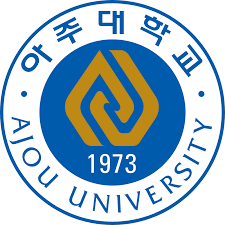
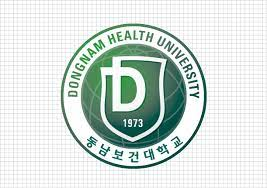
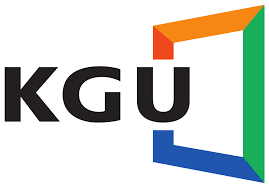
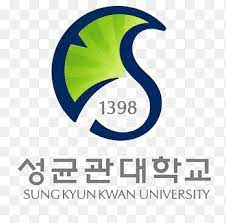
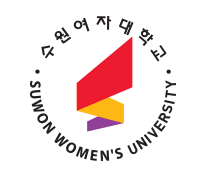
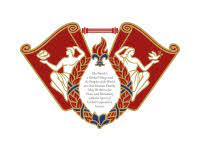
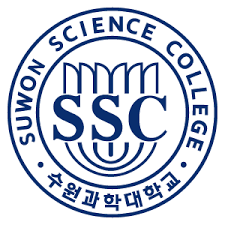
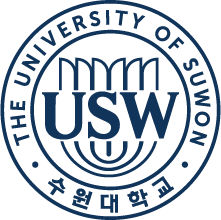

In [41]:
map = folium.Map(location=[df3.위도.mean(), df3.경도.mean()], zoom_start=12)

for i in df3.index:
    logo = folium.CustomIcon(f'data/{df3.logo[i]}' , icon_size=(30,30))
    folium.Marker(
    location=[df3.위도[i], df3.경도[i]], 
    popup=folium.Popup(df3.주소[i], max_width=200), 
    tooltip=df3.대학교[i],
    icon=logo
).add_to(map)
    
title_html = '<h3 align="center" style="font-size:20px">수원 근처 대학교</h3>' # 지도 제목달기
map.get_root().html.add_child(folium.Element(title_html))
map